In [1]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [2]:
dir = "/content/drive/MyDrive/Projet/Langues/MFCC/Russian/Preprocessing"

X_test_files_F = [filename for filename in os.listdir(dir + ("/Test/F")) if filename.endswith('txt')]
X_test_files_H = [filename for filename in os.listdir(dir + ("/Test/H")) if filename.endswith('txt')]


X_test = []
for file_name in X_test_files_F:
    mfcc_array = np.loadtxt(os.path.join(dir + ("/Test/F"), file_name), delimiter=',')
    X_test.append(mfcc_array)
for file_name in X_test_files_H:
    mfcc_array = np.loadtxt(os.path.join(dir + ("/Test/H"), file_name), delimiter=',')
    X_test.append(mfcc_array)

X_test = np.concatenate(X_test, axis=0).reshape(-1,1)

In [3]:
frames_5s = 500
frames_10s = 1000
frames_15s = 1500

total_frames = X_test.shape[0]

num_segments_5s = total_frames // frames_5s
num_segments_10s = total_frames // frames_10s
num_segments_15s = total_frames // frames_15s

# Split X_test into segments of each duration
five_secs = np.array_split(X_test[:num_segments_5s * frames_5s], num_segments_5s)
ten_secs = np.array_split(X_test[:num_segments_10s * frames_10s], num_segments_10s)
fifteen_secs = np.array_split(X_test[:num_segments_15s * frames_15s], num_segments_15s)

In [4]:
print(len(five_secs))
print(len(ten_secs))
print(len(fifteen_secs))

238
119
79


In [5]:
five_secs_arr = np.squeeze(np.array(five_secs))
ten_secs_arr = np.squeeze(np.array(ten_secs))
fifteen_secs_arr = np.squeeze(np.array(fifteen_secs))

In [6]:
print(five_secs_arr.shape)
print(ten_secs_arr.shape)
print(fifteen_secs_arr.shape)

(238, 500)
(119, 1000)
(79, 1500)


In [7]:
# Loading Models :
gmm_ar_16 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Arabic/gmm_arabe16.gmm')
gmm_en_16 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/English/gmm_english16.gmm')
gmm_fr_16 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/French/gmm_french16.gmm')
gmm_russ_16 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Russian/gmm_russian16.gmm')

gmm_ar_32 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Arabic/gmm_arabe32.gmm')
gmm_en_32 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/English/gmm_english32.gmm')
gmm_fr_32 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/French/gmm_french32.gmm')
gmm_russ_32 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Russian/gmm_russian32.gmm')

gmm_ar_64 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Arabic/gmm_arabe64.gmm')
gmm_en_64 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/English/gmm_english64.gmm')
gmm_fr_64 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/French/gmm_french64.gmm')
gmm_russ_64 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Russian/gmm_russian64.gmm')

gmm_ar_128 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Arabic/gmm_arabe128.gmm')
gmm_en_128 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/English/gmm_english128.gmm')
gmm_fr_128 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/French/gmm_french128.gmm')
gmm_russ_128 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Russian/gmm_russian128.gmm')

gmm_ar_256 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Arabic/gmm_arabe256.gmm')
gmm_en_256 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/English/gmm_english256.gmm')
gmm_fr_256 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/French/gmm_french256.gmm')
gmm_russ_256 = joblib.load('/content/drive/MyDrive/Projet/Langues/GMM/Russian/gmm_russian256.gmm')


In [8]:
gmm16 = [gmm_ar_16, gmm_en_16, gmm_fr_16, gmm_russ_16]
gmm32 = [gmm_ar_32, gmm_en_32, gmm_fr_32, gmm_russ_32]
gmm64 = [gmm_ar_64, gmm_en_64, gmm_fr_64, gmm_russ_64]
gmm128 = [gmm_ar_128, gmm_en_128, gmm_fr_128, gmm_russ_128]
gmm256 = [gmm_ar_256, gmm_en_256, gmm_fr_256, gmm_russ_256]

gmms = np.array([gmm16, gmm32, gmm64, gmm128, gmm256])

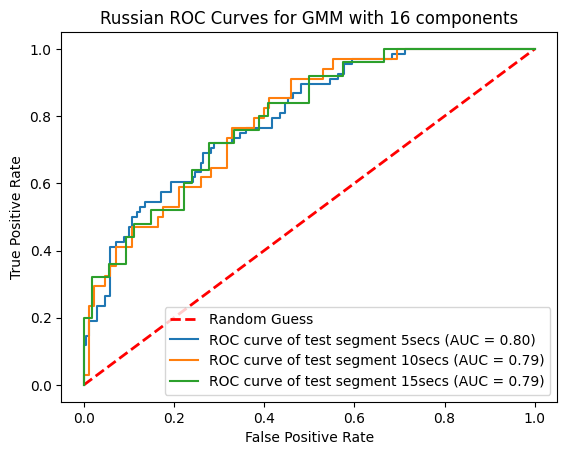

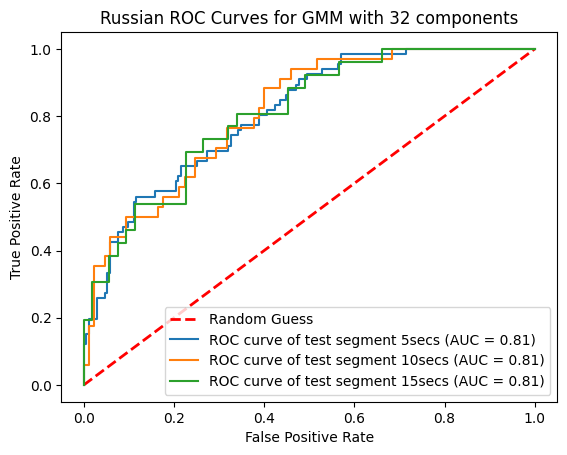

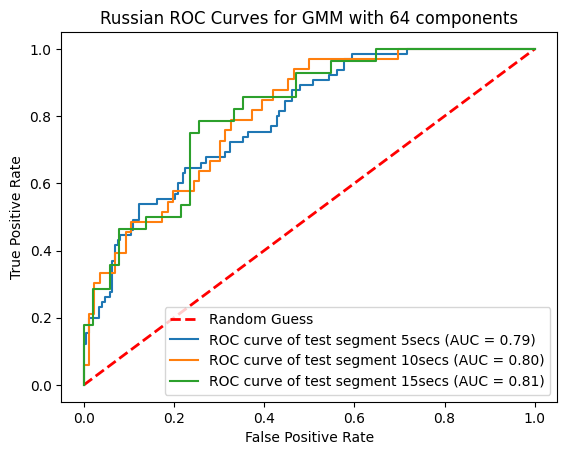

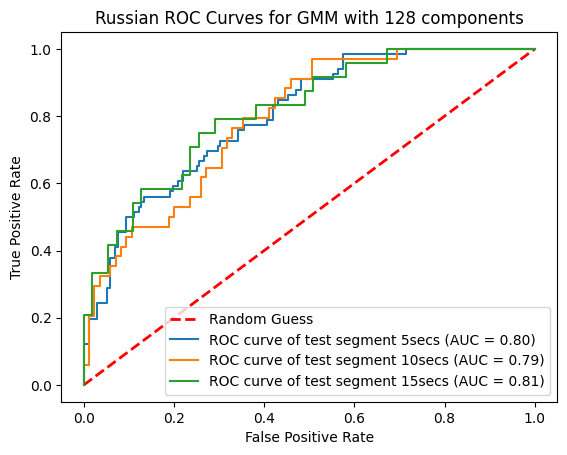

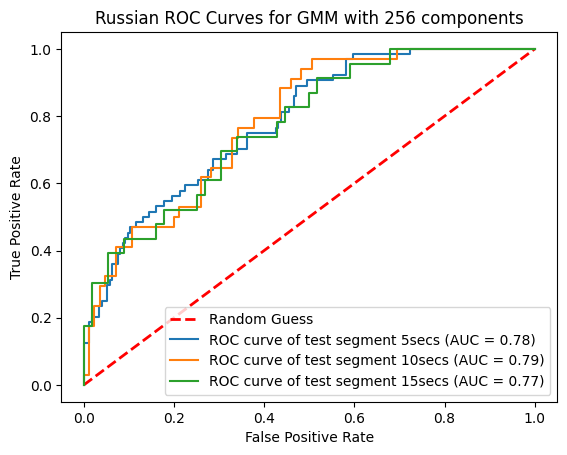

In [9]:
test_segments = [five_secs_arr, ten_secs_arr, fifteen_secs_arr]

for gmm in gmms :

  fpr_list = []
  tpr_list = []
  roc_auc_list = []

  for test_segment in test_segments :

      df = pd.DataFrame(columns=['Segment ID', 'max_score', 'predicted_lang'])

      for i, segment in enumerate(test_segment):

        score_ar = gmm[0].score(segment.reshape(-1,1))
        score_en = gmm[1].score(segment.reshape(-1,1))
        score_fr = gmm[2].score(segment.reshape(-1,1))
        score_russ = gmm[3].score(segment.reshape(-1,1))

        max_score = np.max([score_ar, score_en, score_fr, score_russ])
        predicted = np.argmax([score_ar, score_en, score_fr, score_russ])
        if predicted != 2 :
          predicted = 0
        else:
          predicted = 1

        row = {'Segment ID': i, 'max_score': max_score, 'predicted_lang': predicted}

        df.loc[len(df)] = row

      # ROC curve
      fpr, tpr, thresholds = roc_curve(df['predicted_lang'], df['max_score'])
      roc_auc = auc(fpr, tpr)

      fpr_list.append(fpr)
      tpr_list.append(tpr)
      roc_auc_list.append(roc_auc)

  # plot all ROC curves
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess')
  for i, roc_auc in enumerate(roc_auc_list):
    if i == 0 :
      plt.plot(fpr_list[i], tpr_list[i], label='ROC curve of test segment 5secs (AUC = %0.2f)' % (roc_auc))
    elif i == 1 :
      plt.plot(fpr_list[i], tpr_list[i], label='ROC curve of test segment 10secs (AUC = %0.2f)' % (roc_auc))
    else :
      plt.plot(fpr_list[i], tpr_list[i], label='ROC curve of test segment 15secs (AUC = %0.2f)' % (roc_auc))

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  if len(gmm[0].means_) == 16:
      plt.title('Russian ROC Curves for GMM with 16 components')
  elif len(gmm[0].means_) == 32:
      plt.title('Russian ROC Curves for GMM with 32 components')
  elif len(gmm[0].means_) == 64:
      plt.title('Russian ROC Curves for GMM with 64 components')
  elif len(gmm[0].means_) == 128:
      plt.title('Russian ROC Curves for GMM with 128 components')
  else :
      plt.title('Russian ROC Curves for GMM with 256 components')
  plt.legend(loc="lower right")
  plt.show()



In [ ]:
# Save the segments
np.savetxt(dir + "/five_secs.txt", five_secs_arr , delimiter=',') 
np.savetxt(dir + "/ten_secs.txt", ten_secs_arr, delimiter=',') 
np.savetxt(dir + "/fifteen_secs.txt", fifteen_secs_arr, delimiter=',') 